# Download scores file

To run this notebook, please first download the scores zip file at
https://drive.google.com/open?id=1eTjsmUz3orClxWSshwLmTWaxE003bcrP
and unzipped under the same directory in which this notebook is located.


## Thesis

1. incorrect view of having a very big dataset


## Issues:

1. Re-consider the small dataset excluded: are they similar to certain large dataset?
2. Is AUROC weighted or not (currently weighted)



## All
* instance-base:	0.997
* cruise-base:	0.882
* Percentage editted out (unweighted): 5.105
* Percentage editted out (weighted): 5.747

## NGDC: National Geophysical Data Center
* instance-base:	0.999
* cruise-base:	0.911 -> 0.892 -> 0.949
* Area (NGDC_UNOLS): **4.4000**
* Percentage editted out (unweighted): 4.751
* Percentage editted out (weighted): 5.869

- Verify accuracy, check a sample of the 
- Rescue/throw out - disagreement between label and the model


## JAMSTEC: Japan Agency for Marine-Earth Science and Technology
* instance-base:	1.000
* cruise-base:	0.670 -> 0.924 -> 0.871
* Area: **1.5226**
* Percentage editted out (unweighted): 4.306
* Percentage editted out (weighted): 0.320

- Check a sample of the examples that are probably editted out incorrectly
- Desired outcome: rescue


## NOAA_geodas: National Oceanic and Atmospheric Administration
* instance-base:	0.992
* cruise-base:	0.840 -> 0.837 -> 0.936
* Area: **1.04**
* Percentage editted out (unweighted): 11.063
* Percentage editted out (weighted): 10.724



## SIO: Scripps Institution of Oceanography
* instance-base:	0.999
* cruise-base:	0.894 -> 0.944 -> 0.960
* Area: **0.9577**
* Percentage editted out (unweighted): 13.137
* Percentage editted out (weighted): 12.876

## AGSO: Australian Geological Survey Organisation
* instance-base:	0.996
* cruise-base:	0.992 -> 0.950 -> 0.996
* Area: **0.3527**
* Percentage editted out (unweighted): 1.961
* Percentage editted out (weighted): 2.751

## NGA: National Geospatial-Intelligence Agency
* instance-base:	0.993
* cruise-base:	0.855 -> 0.922 -> 0.973
* Area: **0.0609**
* Percentage editted out (unweighted): 19.340
* Percentage editted out (weighted): 26.070

## US_multi
* instance-base:	0.999
* cruise-base:	0.835 -> 0.974 -> 0.960
* Percentage editted out (unweighted): 5.301
* Percentage editted out (weighted): 4.116


## NGDC: National Geophysical Data Center
* cruise-base:	0.911 -> 0.892

- Verify accuracy, check a sample of the 
- Rescue/throw out - disagreement between label and the model


## JAMSTEC: Japan Agency for Marine-Earth Science and Technology
* cruise-base:	0.670 -> 0.924

- Check a sample of the examples that are probably editted out incorrectly
- Desired outcome: rescue


## NOAA_geodas: National Oceanic and Atmospheric Administration
* cruise-base:	0.840 -> 0.837



## SIO: Scripps Institution of Oceanography
* cruise-base:	0.894 -> 0.944

## AGSO: Australian Geological Survey Organisation
* cruise-base:	0.992 -> 0.950

## NGA: National Geospatial-Intelligence Agency
* cruise-base:	0.855 -> 0.922

## US_multi
* cruise-base:	0.835 -> 0.974



In [63]:
configs = ["instance-base", "cruise-base"]
sources = ['All', 'NGDC', 'JAMSTEC', 'NOAA_geodas', 'SIO', 'AGSO', 'NGA', 'US_multi']

per_neg = {}
for w, region, per in map(lambda t: t.rsplit(' ', 3)[-3:], """instance-base unweighted All 0.05105028304209253
instance-base unweighted AGSO 0.019610884369144727
instance-base unweighted JAMSTEC 0.043062568058426356
instance-base unweighted JAMSTEC2 0.0
instance-base unweighted NGA 0.19339924577439802
instance-base unweighted NGDC 0.047506083499829314
instance-base unweighted NOAA_geodas 0.11062878247132907
instance-base unweighted SIO 0.1313663745620518
instance-base unweighted US_multi 0.05301296656555761
cruise-base, weighted All 0.05747383536471245
cruise-base, weighted AGSO 0.027507877714512956
cruise-base, weighted JAMSTEC 0.0031955531606219375
cruise-base, weighted JAMSTEC2 0.0
cruise-base, weighted NGA 0.2606975930813011
cruise-base, weighted NGDC 0.05869086864648296
cruise-base, weighted NOAA_geodas 0.10723597443636593
cruise-base, weighted SIO 0.12876430061448285
cruise-base, weighted US_multi 0.041164912217091655""".split('\n')):
    if w not in per_neg:
        per_neg[w] = {}
    per_neg[w][region] = float(per)

names = {
    "NGDC":    "National Geophysical Data Center",
    "JAMSTEC": "Japan Agency for Marine-Earth Science and Technology",
    "NOAA_GEODAS": "National Oceanic and Atmospheric Administration",
    "SIO": "Scripps Institution of Oceanography",
    "AGSO": "Australian Geological Survey Organisation",
    "NGA": "National Geospatial-Intelligence Agency",
}
areas = {
    "NGDC": 4.4000,
    "JAMSTEC": 1.5226,
    "NOAA_GEODAS": 1.0400,
    "SIO": 0.9577,
    "AGSO": 0.3527,
    "NGA": 0.0609,
}

for name in sources:
    print("## {}".format(name), end='')
    if name.upper() in names:
        print(": {}".format(names[name.upper()]))
    else:
        print()
    for config in configs:
        print("* {0:}:\t{1:.3f}".format(config, auroc_table[config][name]))
    if name.upper() in areas:
        if name.upper() == "NGDC":
            print("* Area (NGDC_UNOLS): **{:.04f}**".format(areas[name.upper()]))
        else:
            print("* Area: **{}**".format(areas[name.upper()]))
    print("* Percentage editted out (unweighted): {:.3f}".format(per_neg["unweighted"][name] * 100))
    print("* Percentage editted out (weighted): {:.3f}".format(per_neg["weighted"][name] * 100))
    print()

## All
* instance-base:	0.997
* cruise-base:	0.882
* Percentage editted out (unweighted): 5.105
* Percentage editted out (weighted): 5.747

## NGDC: National Geophysical Data Center
* instance-base:	0.999
* cruise-base:	0.911
* Area (NGDC_UNOLS): **4.4000**
* Percentage editted out (unweighted): 4.751
* Percentage editted out (weighted): 5.869

## JAMSTEC: Japan Agency for Marine-Earth Science and Technology
* instance-base:	1.000
* cruise-base:	0.670
* Area: **1.5226**
* Percentage editted out (unweighted): 4.306
* Percentage editted out (weighted): 0.320

## NOAA_geodas: National Oceanic and Atmospheric Administration
* instance-base:	0.992
* cruise-base:	0.840
* Area: **1.04**
* Percentage editted out (unweighted): 11.063
* Percentage editted out (weighted): 10.724

## SIO: Scripps Institution of Oceanography
* instance-base:	0.999
* cruise-base:	0.894
* Area: **0.9577**
* Percentage editted out (unweighted): 13.137
* Percentage editted out (weighted): 12.876

## AGSO: Australian Ge

# Visualize AUROC and AUPRC

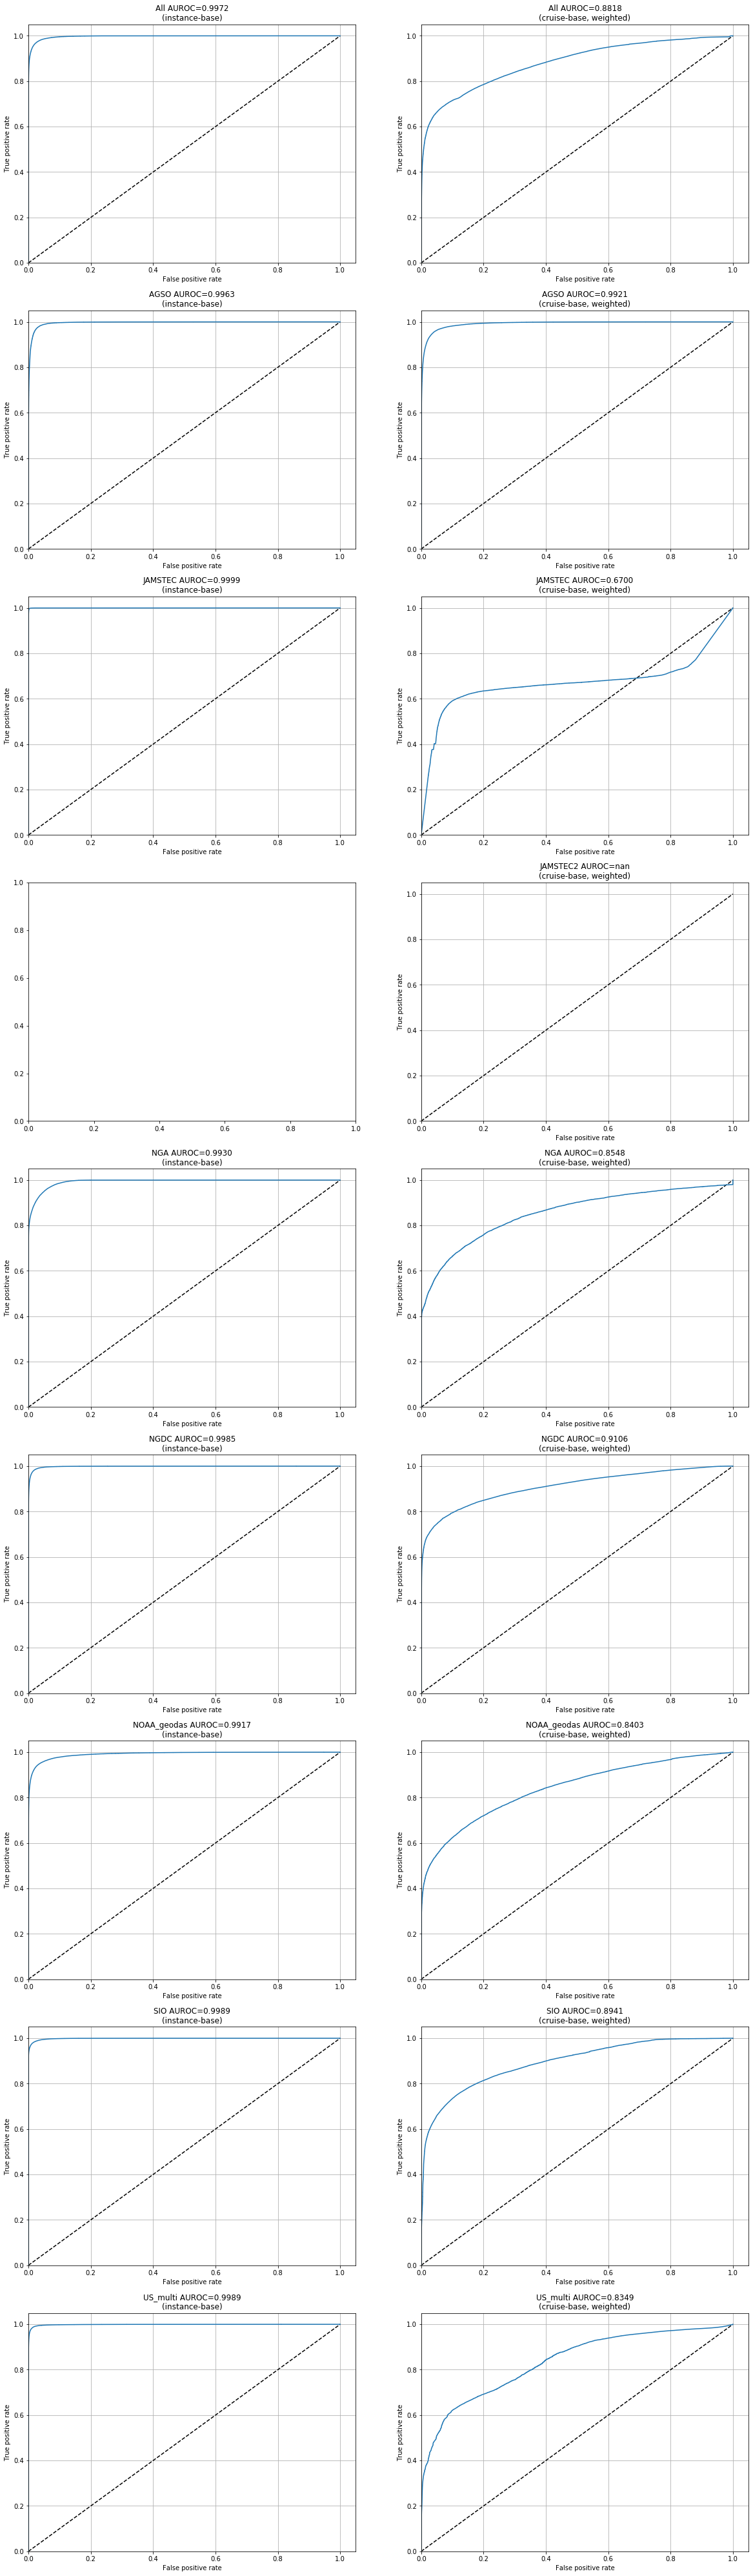

In [10]:
%matplotlib inline
import os
import numpy as np
import pickle as pkl
from matplotlib import pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from inspect import signature


def get_performance(true, scores, weights):
    # loss
    # loss = np.mean(true * -np.log(scores) + (1 - true) * -np.log(1.0 - scores))
    loss = 0.0
    # auprc
    precision, recall, _ = precision_recall_curve(true, scores, sample_weight=weights, pos_label=1)
    auprc = auc(recall, precision)
    # auroc
    fpr, tpr, _ = roc_curve(true, scores, sample_weight=weights, pos_label=1)
    auroc = auc(fpr, tpr)
    # accuracy
    acc = np.sum(true == (scores > 0.5)) / true.shape[0]
    return (loss, acc, (precision, recall, auprc), (fpr, tpr, auroc))


auroc_table = {"instance-base": {}, "cruise-base": {}}
auprc_table = {"instance-base": {}, "cruise-base": {}}

for i, (data_dir, filename_temp, config_name) in enumerate(configs):
    for j, source in enumerate(sources):
        ax = ax_list[j][i]

        if source.lower() == "all":
            (n_pos, n_neg), label_score_weight = cache_all[i]
        else:
            ret = get_label_normalized_scores(data_dir, filename_temp, source)
            if ret is None:
                continue
            (n_pos, n_neg), label_score_weight = ret

        (_, acc, (_, _, auprc), (_, _, auroc)) = get_performance(
            label_score_weight[:, 0], label_score_weight[:, 1], label_score_weight[:, 2]
        )

        auroc_table[config_name.split(',')[0]][source] = auroc
        auprc_table[config_name.split(',')[0]][source] = auprc


fig, ax_list = plt.subplots(len(sources), 2, figsize=(10 * 2, 8 * (len(sources))))

for i, (data_dir, filename_temp, config_name) in enumerate(configs):
    for j, source in enumerate(sources):
        ax = ax_list[j][i]

        if source.lower() == "all":
            (n_pos, n_neg), label_score_weight = cache_all[i]
        else:
            ret = get_label_normalized_scores(data_dir, filename_temp, source)
            if ret is None:
                continue
            (n_pos, n_neg), label_score_weight = ret

        (_, acc, _, (fpr, tpr, auroc)) = get_performance(
            label_score_weight[:, 0], label_score_weight[:, 1], label_score_weight[:, 2]
        )

        ax.plot([0, 1], [0, 1], 'k--')
        ax.plot(fpr, tpr)

        ax.grid();
        ax.set_title("{} AUROC={:.4f}\n({})".format(source, auroc, config_name));
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.05])
        ax.set_xlabel("Recall")
        ax.set_ylabel("Precision")
        ax.set_xlabel('False positive rate')
        ax.set_ylabel('True positive rate')